In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("drugLibTrain_raw.csv")

In [4]:
df.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [5]:
df.columns

Index(['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3089 non-null   object
 7   sideEffectsReview  3032 non-null   object
 8   commentsReview     3095 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB


In [7]:
df.describe()

,Unnamed: 0,rating
count,3107.000000,3107.000000
mean,2080.607016,7.006115
std,1187.998828,2.937582
min,0.000000,1.000000
25%,1062.500000,5.000000
50%,2092.000000,8.000000
75%,3092.500000,9.000000
max,4161.000000,10.000000


In [8]:
df["effectiveness"].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [9]:
df["sideEffects"].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

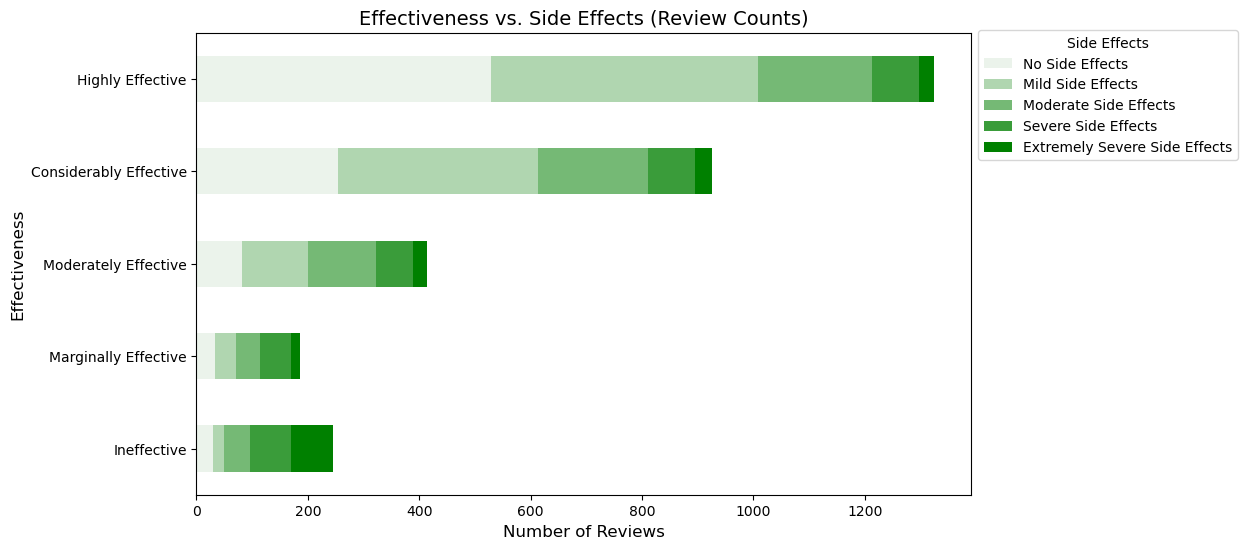

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

effectiveness_order = [
    'Ineffective',
    'Marginally Effective',
    'Moderately Effective',
    'Considerably Effective',
    'Highly Effective'
]

sideEffects_order = [
    'No Side Effects',
    'Mild Side Effects',
    'Moderate Side Effects',
    'Severe Side Effects',
    'Extremely Severe Side Effects'
]

sideEffects_color = sns.light_palette("green", len(sideEffects_order), reverse=False)

data_bar1 = df.pivot_table(index='effectiveness', columns='sideEffects', values='commentsReview', aggfunc='count')
data_bar1 = data_bar1.reindex(index=effectiveness_order, columns=sideEffects_order)

ax = data_bar1.plot(kind='barh', stacked=True, color=sideEffects_color, figsize=(10, 6))

plt.title('Effectiveness vs. Side Effects (Review Counts)', fontsize=14)
plt.ylabel('Effectiveness', fontsize=12)
plt.xlabel('Number of Reviews', fontsize=12)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Side Effects', bbox_to_anchor=(1, 1.02), loc='upper left')

plt.show()


In [10]:

df=df.drop(columns=['Unnamed: 0', 'benefitsReview', 'sideEffectsReview', 'commentsReview','condition','urlDrugName'])

In [11]:
df.head()

,rating,effectiveness,sideEffects
0,4,Highly Effective,Mild Side Effects
1,1,Highly Effective,Severe Side Effects
2,10,Highly Effective,No Side Effects
3,3,Marginally Effective,Mild Side Effects
4,2,Marginally Effective,Severe Side Effects


In [12]:
df.replace(['Ineffective','Marginally Effective','Moderately Effective','Considerably Effective','Highly Effective'],[1,2,3,4,5],inplace=True)

In [13]:
df.replace(['No Side Effects','Mild Side Effects','Moderate Side Effects', 'Severe Side Effects', 
       'Extremely Severe Side Effects'],[1,2,3,4,5],inplace=True)

<Axes: xlabel='effectiveness', ylabel='rating'>

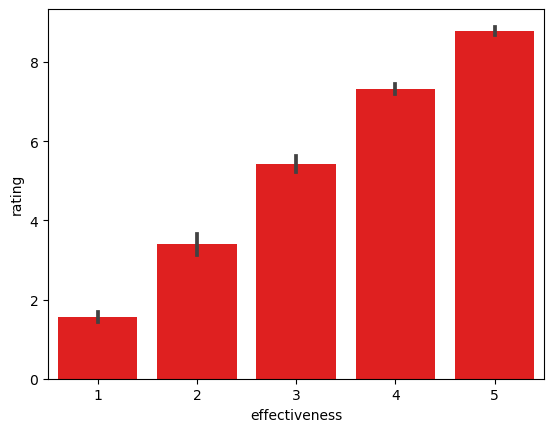

In [14]:
sns.barplot(data=df, x="effectiveness", y="rating",color='r')

In [15]:
df.head()

,rating,effectiveness,sideEffects
0,4,5,2
1,1,5,4
2,10,5,1
3,3,2,2
4,2,2,4


In [16]:
def classify_satisfaction(rating):
    if 1 <= rating <= 2:
        return 'never use again'
    elif 3 <= rating <= 4:
        return 'poor'
    elif 5 <= rating <= 6:
        return 'slightly satisfied'
    elif 7 <= rating <= 8:
        return 'satisfied'
    elif 9 <= rating <= 10:
        return 'highly satisfied'
    else:
        return 'unknown' 
df['customer_satisfaction'] = df['rating'].apply(classify_satisfaction)

In [17]:
def classify_review(rating):
    if 1 <= rating <= 4:
        return 'Negative'
    elif 4 <= rating <= 6:
        return 'Neutral'
    else:
        return 'Positive' 
df['customer_reviews'] = df['rating'].apply(classify_review)

In [20]:
df['customer_reviews'].value_counts()

customer_reviews
Positive    2130
Negative     661
Neutral      316
Name: count, dtype: int64

In [21]:
df.head()

,rating,effectiveness,sideEffects,customer_satisfaction,customer_reviews
0,4,5,2,poor,Negative
1,1,5,4,never use again,Negative
2,10,5,1,highly satisfied,Positive
3,3,2,2,poor,Negative
4,2,2,4,never use again,Negative


In [22]:
df.replace(['never use again','poor','slightly satisfied','satisfied','highly satisfied'],[1,2,3,4,5],inplace=True)

In [23]:
df.replace(['Negative','Neutral','Positive'],[-1,0,1],inplace=True)

In [24]:
df.head()

,rating,effectiveness,sideEffects,customer_satisfaction,customer_reviews
0,4,5,2,2,-1
1,1,5,4,1,-1
2,10,5,1,5,1
3,3,2,2,2,-1
4,2,2,4,1,-1


array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'effectiveness'}>],
       [<Axes: title={'center': 'sideEffects'}>,
        <Axes: title={'center': 'customer_satisfaction'}>],
       [<Axes: title={'center': 'customer_reviews'}>, <Axes: >]],
      dtype=object)

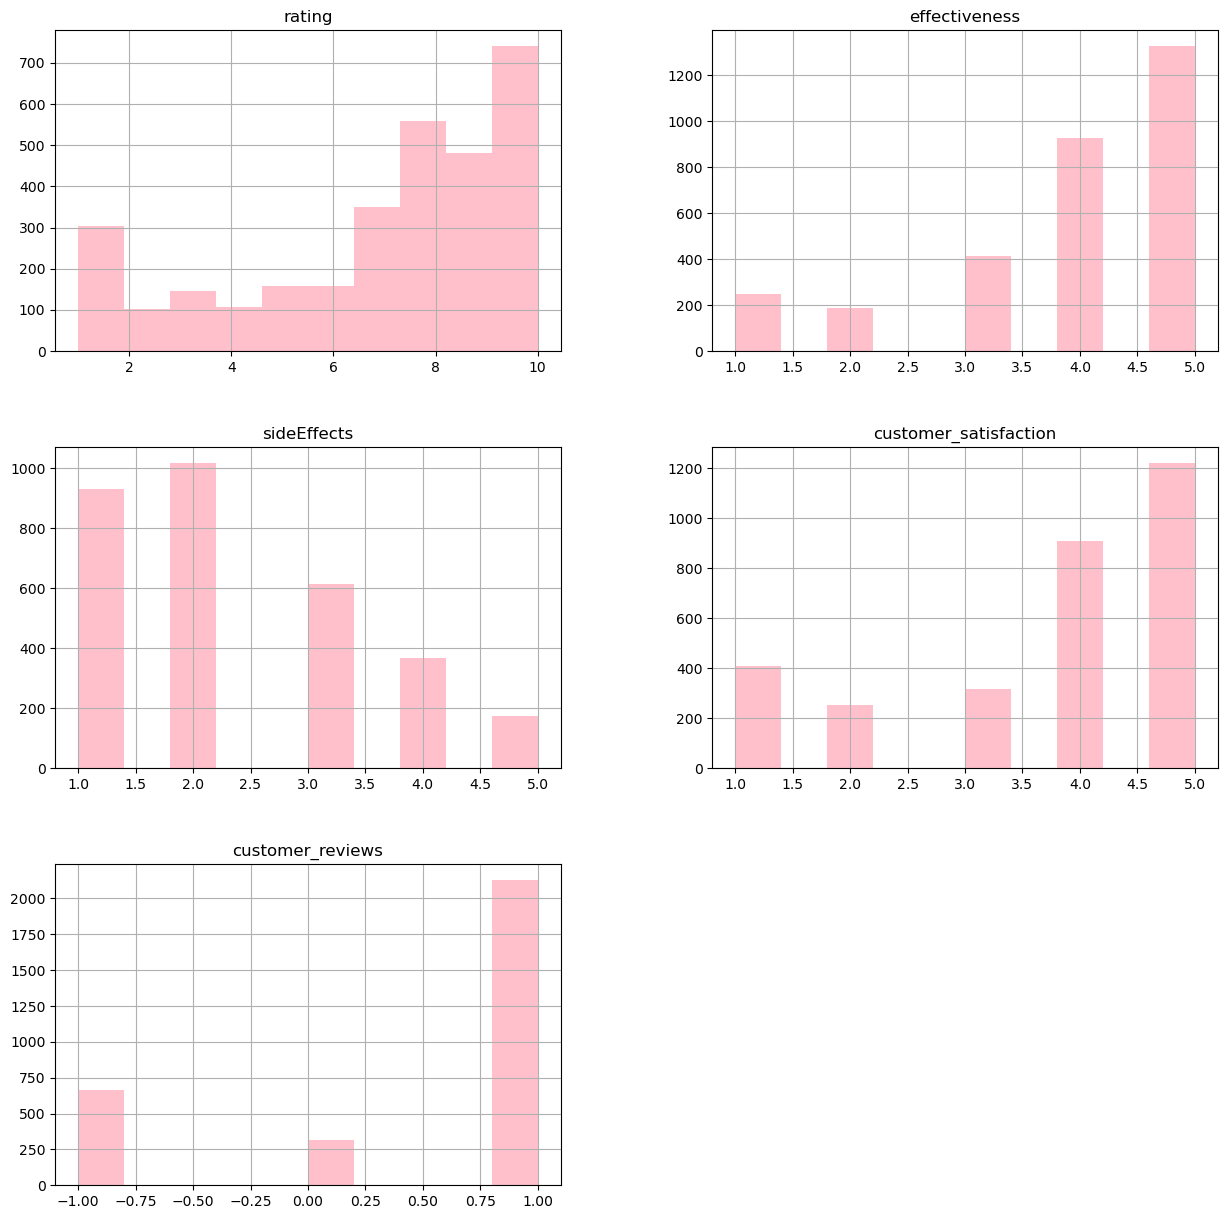

In [25]:
df.hist(figsize=(15, 15),color='pink')

<Axes: xlabel='effectiveness', ylabel='sideEffects'>

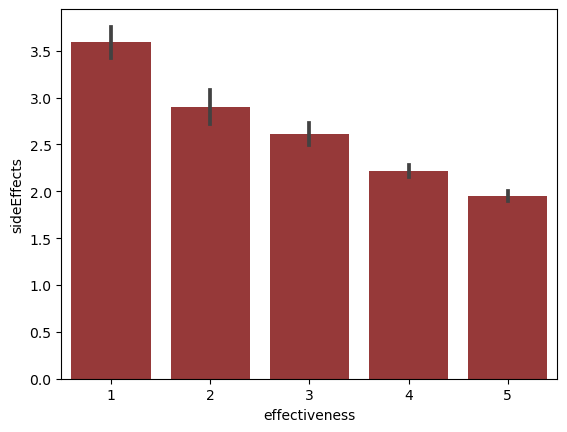

In [252]:
sns.barplot(data=df, x="effectiveness", y="sideEffects",color='brown')


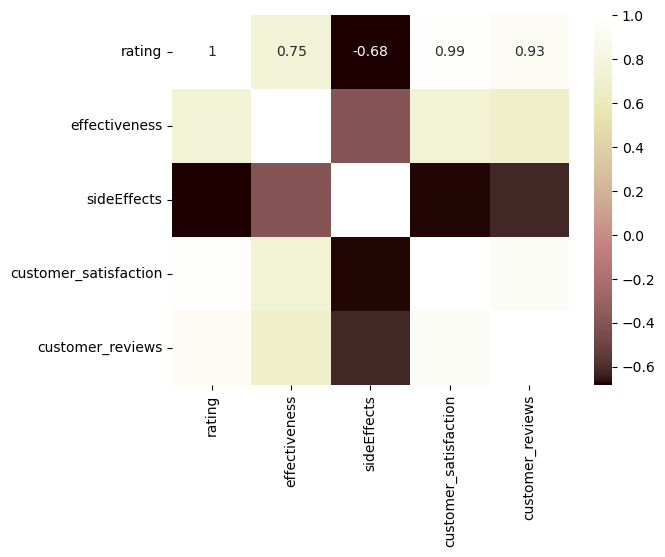

In [26]:
import seaborn as sns
heatmap = sns.heatmap(df.corr(), annot=True, cmap='pink', cbar=True)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
X=df.drop('customer_satisfaction',axis=1)


In [29]:
y=df["customer_satisfaction"]

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:

k=5
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

1.0


In [32]:
df2=pd.read_csv("drugLibTest_raw.csv")
df2.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...


In [33]:
df2.columns

Index(['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview'],
      dtype='object')

In [34]:
df2["effectiveness"].unique()

array(['Considerably Effective', 'Highly Effective',
       'Moderately Effective', 'Marginally Effective', 'Ineffective'],
      dtype=object)

In [35]:
df2["sideEffects"].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Moderate Side Effects', 'Extremely Severe Side Effects'],
      dtype=object)

In [36]:
df2.replace(['Ineffective','Marginally Effective','Moderately Effective','Considerably Effective','Highly Effective'],[1,2,3,4,5],inplace=True)
df2.replace(['No Side Effects','Mild Side Effects','Moderate Side Effects', 'Severe Side Effects', 
       'Extremely Severe Side Effects'],[1,2,3,4,5],inplace=True)

In [37]:
df2.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,1366,biaxin,9,4,2,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,3724,lamictal,9,5,2,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,3824,depakene,4,3,4,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,969,sarafem,10,5,1,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,696,accutane,10,5,2,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...


In [38]:
def classify_satisfaction(rating):
    if 1 <= rating <= 2:
        return 'never use again'
    elif 3 <= rating <= 4:
        return 'poor'
    elif 5 <= rating <= 6:
        return 'slightly satisfied'
    elif 7 <= rating <= 8:
        return 'satisfied'
    elif 9 <= rating <= 10:
        return 'highly satisfied'
    else:
        return 'unknown' 
df2['customer_satisfaction'] = df2['rating'].apply(classify_satisfaction)

In [39]:
def classify_review(rating):
    if 1 <= rating <= 4:
        return 'Negative'
    elif 4 <= rating <= 6:
        return 'Neutral'
    else:
        return 'Positive' 
df2['customer_reviews'] = df2['rating'].apply(classify_review)
df2.replace(['Negative','Neutral','Positive'],[-1,0,1],inplace=True)

In [40]:
df2.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,customer_satisfaction,customer_reviews
0,1366,biaxin,9,4,2,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...,highly satisfied,1
1,3724,lamictal,9,5,2,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...,highly satisfied,1
2,3824,depakene,4,3,4,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...,poor,-1
3,969,sarafem,10,5,1,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...,highly satisfied,1
4,696,accutane,10,5,2,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...,highly satisfied,1


In [41]:
df2=df2.drop(columns=['Unnamed: 0', 'benefitsReview', 'sideEffectsReview', 'commentsReview','condition','urlDrugName'])

In [42]:
df2.head()

,rating,effectiveness,sideEffects,customer_satisfaction,customer_reviews
0,9,4,2,highly satisfied,1
1,9,5,2,highly satisfied,1
2,4,3,4,poor,-1
3,10,5,1,highly satisfied,1
4,10,5,2,highly satisfied,1


In [43]:
df2.replace(['never use again','poor','slightly satisfied','satisfied','highly satisfied'],[1,2,3,4,5],inplace=True)

In [44]:
df2.head()

,rating,effectiveness,sideEffects,customer_satisfaction,customer_reviews
0,9,4,2,5,1
1,9,5,2,5,1
2,4,3,4,2,-1
3,10,5,1,5,1
4,10,5,2,5,1


In [45]:
X=df2.drop('customer_satisfaction',axis=1)
y_test=df2["customer_satisfaction"]
X_test=X
y_pred=knn.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


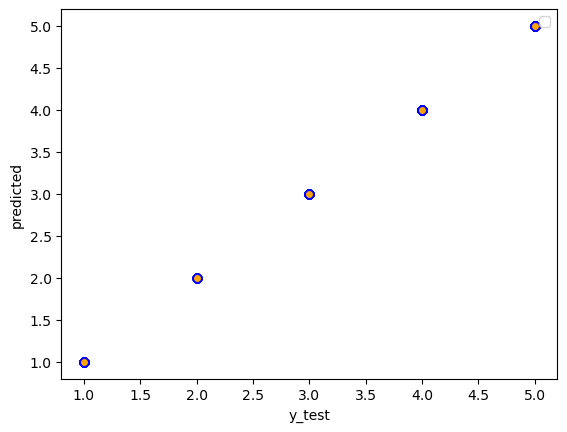

In [46]:
plt.scatter(y_test,y_pred,color='orange',edgecolors='blue')
plt.xlabel('y_test')
plt.ylabel('predicted')
plt.legend()
plt.show()
